MNIST Fashion Dataset 

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


Load data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Verify Data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

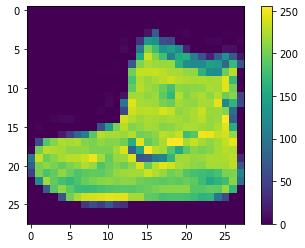

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [7]:
# Normalizee image data
train_images = train_images/255.0
test_images = test_images/255.0

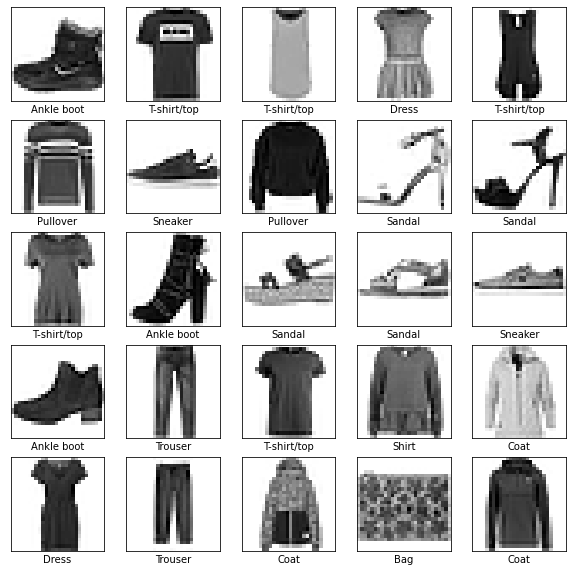

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Build model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Compile the model

In [12]:
model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

Train the model

In [13]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 819us/step - loss: 0.5013 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 1s 783us/step - loss: 0.3756 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 2s 809us/step - loss: 0.3378 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 2s 803us/step - loss: 0.3134 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 2s 830us/step - loss: 0.2953 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 2s 805us/step - loss: 0.2821 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 2s 836us/step - loss: 0.2672 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 2s 804us/step - loss: 0.2562 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 2s 830us/step - loss: 0.2466 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/

Testing the model

In [14]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 659us/step - loss: 0.3233 - accuracy: 0.8871


In [15]:
print("Test accuracy: ",test_acc)

Test accuracy:  0.8870999813079834


**Making predictions**

The models outputs are logits. Pass them through a softmax layer to get probabilities that are easily interpretable

In [16]:
probability_model=tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [17]:
# making predictions on all the batches in the test set
predictions = probability_model.predict(test_images)

In [21]:
# Get predictions
# predictions will be an array of 10 numbers that represent the model's confidence that image corresponds to the class
predictions[0]

array([1.3467373e-10, 6.7479126e-12, 9.8045363e-11, 1.3639057e-12,
       3.7898521e-12, 1.6320409e-03, 1.7149331e-11, 7.7795750e-03,
       2.4553280e-08, 9.9058843e-01], dtype=float32)

In [22]:
# get the class with the maximum value
np.argmax(predictions[0])

9

In [23]:
# check with ground truth
test_labels[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

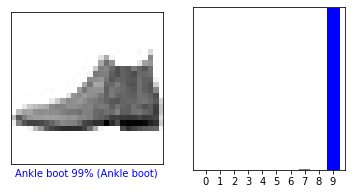

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

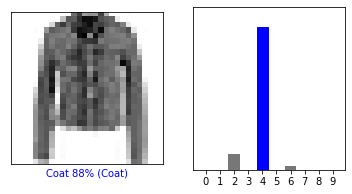

In [27]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

**Making prediction on a single image**

In [28]:
# Get a single image

img = test_images[1]
img.shape

(28, 28)

In [29]:
# keras models are optimized to make predictions on batches, so even when you have one image you need to add it to a list

img=(np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.2071508e-05 2.1145425e-12 9.9863571e-01 2.3335369e-09 1.1861161e-03
  1.2287682e-13 1.2610063e-04 2.2123407e-18 3.1541830e-08 1.1252189e-15]]


In [32]:
np.argmax(predictions_single)

2